In [1]:
import scipy.stats as stats
import statistics 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## 評分標準  
- 沒寫H0H1 -2%  
- 沒寫mu_D / mu1, mu2 定義 -2% （eg mu1表去年、mu2表今年平均等, 13.100因題目本身已有分company1, 2 故可不用寫）  
- 沒寫reject H0 or not, why -2%  
- 沒寫conclusion -2%

## 13.95 (25%) (a:5%, c:5%, d:5%)  
Let mu1 be mu of last year and mu2 be mu of this year  

In [2]:
df95 = pd.read_excel('Xr13-95.xlsx')

this = df95['This Year'].values
last = df95['Last Year'].values

difference = this - last

n = difference.shape[0]
df = n-1

Check for normality


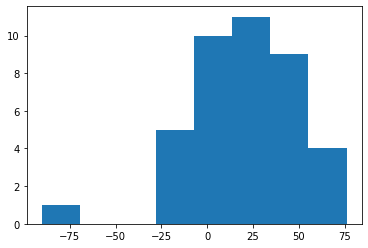

In [3]:
print("Check for normality")
_ = plt.hist(difference, bins = "auto")

The distribution is roughly bell-shaped. We can proceed with the assumption that sample mean is t-distributed.

#### (a)

In [4]:
t_CL =  stats.t.ppf(q=.05,df=df) * (difference.var(ddof=1)**0.5)/(n**0.5)
LCL = difference.mean() - t_CL
UCL = difference.mean() + t_CL
print("LCL = ", LCL)
print("UCL = ", UCL)

LCL =  27.9109927892535
UCL =  11.5890072107465


#### (b)  
H0: (mu2 – mu1) = 0  
H1: (mu2 – mu1) > 0  

In [5]:
t_value = difference.mean() / (difference.var(ddof=1)**0.5)*(n**0.5)
print("t-value =",t_value)

ptmp = stats.t.cdf(t_value,df)
p_value_right = 1-ptmp
print(f"p_value (right tail) = {p_value_right:.4f}")

t-value = 4.077479844595904
p_value (right tail) = 0.0001


Since pvalue < significance level = 0.05, we reject H0.  
There is enough evidence to conclude that companies that advertise in the Yellow Pages have higher sales than companies that do not.

#### (c)  
The histogram of the differences is bell shaped.
#### (d)  
No, because we expect a great deal of variation between stores.


## 13.100 (25%)  
Let mu1 be mu of company 1 and mu2 be mu of company 2  
H0: (mu1 – mu2) = 0  
H1: (mu1 – mu2) > 0  

In [6]:
df100 = pd.read_excel('Xr13-100.xlsx')

one = df100['Company 1'].values
two = df100['Company 2'].values

difference = one - two

Check for normality


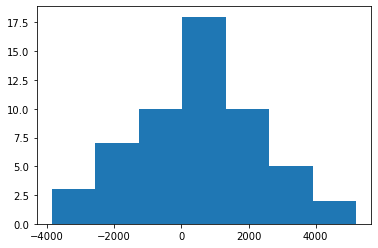

In [7]:
print("Check for normality")
_ = plt.hist(difference, bins = "auto")

The distribution is roughly bell-shaped. We can proceed with the assumption that sample mean is t-distributed.

In [8]:
n=difference.shape[0]
df=n-1

t_value = difference.mean() / (difference.var(ddof=1)**0.5)*(n**0.5)
print("t-value =",t_value)

ptmp=stats.t.cdf(t_value,df)
p_value_right=1-ptmp
print(f"p_value (right tail) = {p_value_right:.4f}")

t-value = 2.0824367210956813
p_value (right tail) = 0.0210


Since pvalue < significance level = 0.05, we reject H0.  
There is enough evidence to infer that company 1’s calculated tax payable is higher than company 2’s.

## 13.130 (25%)  
Let p1 be extended warranty rate of regular, p2 be extended warranty rate of sale.  
H0: (p1 – p2) = 0  
H1: (p1 – p2) > 0  

In [9]:
n1 = 229
n2 = 178

p1 = 47/n1
p2 = 25/n2

print("Check for normality.")
print("check p1:", bool(p1*n1 > 5))
print("check p2:", bool(p2*n2 > 5))

Check for normality.
check p1: True
check p2: True


In [10]:
p_pool = (47+25)/(n1+n2)

sd_p_pool = (p_pool * (1-p_pool) * (1/n1 + 1/n2))**0.5
z_value = (p1-p2)/sd_p_pool

print(f"p1 = {p1:.4f}")
print(f"p2 = {p2:.4f}")
print(f"sd_p_pool = {sd_p_pool:.4f}")
print(f"z-value = {z_value:.4f}")
p_value = 1 - stats.norm.cdf(z_value)
print(f"p-value = {p_value:.4f}")

p1 = 0.2052
p2 = 0.1404
sd_p_pool = 0.0381
z-value = 1.6992
p-value = 0.0446


P-value=0.0446 (<0.1), reject H0  
So, there is enough evidence to conclude that those who paid the regular price are more likely to buy an extended warranty.

## 13.156 (25%)  
Let p1 be callback rate of no religion and p2 be callback rate of religion.  
H0: (p1 – p2) = 0  
H1: (p1 – p2) > 0  

In [11]:
df156 = pd.read_excel('Xr13-156.xlsx')

NO = df156['No religion'].dropna()
YES = df156['Religion'].dropna()

n_NO = NO.shape[0]
n_YES = YES.shape[0]

NO = NO==1
YES = YES==1

p1 = NO.mean()
p2 = YES.mean()

print("Check for normality.")
print("check p1:", bool(NO.mean()*n_NO > 5))
print("check p2:", bool(YES.mean()*n_YES > 5))

Check for normality.
check p1: True
check p2: True


In [12]:
all = np.concatenate([NO, YES])
p_pool = all.mean()

sd_p_pool = (p_pool * (1-p_pool) * (1/n_NO + 1/n_YES))**0.5
z_value = (p1-p2)/sd_p_pool

print(f"p1 = {p1:.4f}")
print(f"p2 = {p2:.4f}")
print(f"sd_p_pool = {sd_p_pool:.4f}")
print(f"z-value = {z_value:.4f}")
p_value = (1 - stats.norm.cdf(z_value))
print(f"p-value (right tail) = {p_value:.4f}")

p1 = 0.0850
p2 = 0.0750
sd_p_pool = 0.0068
z-value = 1.4744
p-value (right tail) = 0.0702


Since p-value > 0.05, we do not rehect H0.  
There is not enough evidence to infer that including a reference to religious activity reduces the probability of a callback.